# Analyzing Sentiments in Amazon Product Reviews

## Introduction

The e-commerce industry is a digital marketplace where businesses sell products or services online, offering consumers a convenient way to shop and access a wide range of products. This industry facilitates global connections between consumers and businesses, with a focus on online transactions, secure payment options, and reliable delivery services <sup>[1]</sup>. Customers often provide feedback and reviews regarding their purchases, providing valuable insights into product quality, features, and performance. In this ever-evolving landscape, customer feedback and product reviews hold immense value, guiding potential buyers in making informed decisions by considering the experiences of others who have used the products.

### Domain-Specific Area

Today, the abundance of product reviews and customer feedback presents significant challenges. Navigating through numerous reviews can be overwhelming for consumers, leading to difficulties in making well-informed decisions that align with their specific preferences, needs, and expectations. This makes it challenging to assess the suitability of products for specific requirements. Furthermore, the subjective nature of product reviews reflects individual opinions and experiences, making it harder for consumers to evaluate the credibility and relevance of reviews <sup>[2]</sup>. Additionally, the presence of fake or biased reviews can deceive consumers and undermine their trust in the review system <sup>[3]</sup>. For large e-commerce platforms like Amazon, organizing and analyzing feedback efficiently can be overwhelming. These platforms serve as comprehensive e-commerce platforms, offering businesses access to a wide customer base, streamlined selling processes, and various tools and services to showcase and distribute their products. However, these platforms need robust systems to collect, organize, and ensure the authenticity and reliability of reviews. With the sheer volume of product reviews, businesses face the challenges of extracting valuable insights from a plethora of reviews while balancing diverse opinions and resolving conflicts.

To address these challenges, sentiment analysis, a prominent field of natural language processing, comes into play. Sentiment analysis focuses on extracting subjective information from text data. It determines and classifies the emotional tone or attitude expressed in each piece of text <sup>[4]</sup>. In this project, we specifically address the problem of sentiment analysis applied to customer reviews of products on the Amazon platform. Our goal is to develop a text classifier that analyzes customer reviews to determine sentiment polarity. This classification will help us understand customer satisfaction, opinions, and sentiments towards different products. With access to an unprecedented amount of data, online businesses can uncover emerging trends and understand market demands <sup>[5]</sup>.

By collecting and analyzing product reviews through text classification and sentiment analysis, businesses can personalize recommendations, monitor brand reputation, and respond to customer feedback. This encourages businesses to adapt their offerings, stay relevant, and consistently meet consumer needs and expectations. Additionally, sentiment analysis enables the filtering and categorization of reviews as positive, negative, or neutral. Users can filter reviews based on sentiment to make more informed decisions, fostering a transparent and trustworthy relationship between consumers and businesses <sup>[6]</sup>. This emphasizes the crucial connection between consumers and the e-commerce industry. In the industry, sentiment analysis plays a crucial role in various areas. For e-commerce platforms like Amazon, effective sentiment analysis can provide valuable insights into customer satisfaction levels, product performance, and emerging trends. Ultimately, this enhances the overall customer experience, allowing businesses to tailor their marketing strategies and maintain a positive brand image <sup>[7]</sup>.

### Objectives

The primary objective of this project is to develop a text classifier for sentiment analysis applied to customer reviews of products in the e-commerce industry, with a specific focus on the Amazon platform. By leveraging natural language processing techniques and machine learning algorithms, our goal is to accurately classify customer reviews as positive, negative, or neutral to provide valuable insights into customer sentiment towards different products. The justification for this project stems from the significant challenges associated with the abundance of product reviews, the subjective nature of opinions, and the presence of fake or biased reviews. Navigating through a large volume of reviews can be overwhelming for consumers, hindering their ability to make well-informed decisions aligned with their preferences and needs. Furthermore, the subjective nature of reviews poses difficulties in evaluating their credibility and relevance, while the presence of fake or biased reviews can deceive consumers and undermine trust in the review system. By automating the sentiment analysis process, our text classifier will address these challenges and provide an efficient solution. The developed classifier will enable businesses to efficiently navigate through a large volume of customer feedback, extracting valuable insights into customer satisfaction, preferences, and expectations.

The outcomes of this project will benefit businesses operating on e-commerce platforms like Amazon by enabling them to extract valuable insights from customer reviews and make strategic improvements to their products and services. By accurately classifying customer reviews, businesses will be able to personalize recommendations, monitor brand reputation, and promptly respond to customer feedback. This data-driven decision-making process will empower businesses to adapt their offerings to meet consumer needs, maintain a positive brand image, and ultimately improve customer satisfaction. This project aims to establish a stronger connection between consumers and the e-commerce industry, promoting a mutually beneficial relationship based on trust, satisfaction, and continuous improvement. Sentiment-based filtering and categorization of reviews will provide consumers with a transparent and trustworthy platform to make more informed purchasing decisions.

Ultimately, this project will have a significant impact and contribute to the field of sentiment analysis in the e-commerce industry. The results may introduce novel techniques or approaches to sentiment analysis in customer reviews, shedding light on the performance of different machine learning algorithms or feature engineering methods in this specific context. In addition, our work may lead to the development of a benchmark dataset or evaluation metrics tailored to sentiment analysis in e-commerce product reviews, facilitating future research and practical applications in this domain.

## Load the Dataset

The Amazon Product Reviews dataset contains a collection of customer reviews for various products available on the Amazon platform. The dataset was obtained from Kaggle, a platform hosting diverse datasets for public use. It was contributed by a Kaggle user named A. Rumi <sup>[8]</sup>. The dataset is valuable for sentiment analysis in the e-commerce domain, providing insights into customer opinions and satisfaction.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


The dataset contains information about Amazon product reviews and consists of the following columns:
1. `Id`: A unique identifier for each review.
2. `ProductId`: The unique identifier of the product being reviewed.
3. `UserId`: The unique identifier of the user who wrote the review.
4. `ProfileName`: The name associated with the user's profile.
5. `HelpfulnessNumerator`: The number of users who found the review helpful.
6. `HelpfulnessDenominator`: The total number of users who indicated whether the review was helpful or not.
7. `Score`: The rating given by the user on a scale of 1 to 5.
8. `Time`: The timestamp when the review was posted.
9. `Summary`: A brief summary or title of the review.
10. `Text`: The full text of the review.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


The dataset consists of 568,454 rows and 10 columns, indicating a substantial amount of review data for analysis. It provides a diverse range of customer sentiments and opinions towards various Amazon products. The columns consist of a mix of numerical (`int64`) and textual (`object`) data types. Numerical data types represent quantitative information such as ratings and timestamps, while textual data types capture qualitative information like review summaries and full-text reviews.

By utilizing this dataset, we aim to develop a text classifier for sentiment analysis, enabling us to accurately classify customer reviews as positive, negative, or neutral. This classification will provide valuable insights into customer sentiment towards different Amazon products and empower businesses to make data-driven decisions, enhancing the overall customer experience in the e-commerce industry.

## Data Preprocessing

### Handle Missing Values

In [5]:
# check for missing values

df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

We identified a small number of missing values in the `ProfileName` and `Summary` columns. As the number of missing values is relatively low, we choose to remove the corresponding rows from the dataset. This step is essential to ensure our analysis is based on complete and reliable data. By removing these rows, we preserve the dataset's integrity and maintain the overall quality of our analysis. With the dataset's large size (568,454 entries), the removal of these rows has minimal impact. As a result, we can proceed confidently with our analysis, knowing it relies on trustworthy and complete data.

In [6]:
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [7]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

### Remove Duplicate Entries

To ensure data integrity and unbiased analysis, we will identify and remove duplicate entries from the dataset. The removal of duplicates does not significantly impact the overall insights as they contain redundant information. By eliminating duplicates, we enhance the accuracy of our analysis, ensuring that each review is represented uniquely. Consequently, the resulting dataset represents a more accurate and representative sample of product reviews, enabling us to draw meaningful insights from the data. Removing duplicate entries prevents bias and ensures that each review contributes distinct information to our analysis.

In [8]:
df.drop_duplicates(subset=['ProductId', 'UserId', 'Time', 'Summary','Text'], keep='last')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


### Remove Irrelevant Columns

The `Id`, `ProductId`, and `UserId` columns serve as unique identifiers and do not directly impact sentiment analysis. Although the `ProfileName` column may contain valuable reviewer information, it is not directly relevant to our objective. Our focus lies on the sentiment expressed in the `Summary` and `Text` columns, which reflect customer opinions and experiences. To streamline our analysis and maintain focus on sentiment, we are removing the `Id`, `ProductId`, `UserId`, and `ProfileName` columns. This ensures that our analysis centers on the essential information pertinent to our project's objective. By removing these irrelevant columns, we can effectively extract sentiment and gain valuable insights into customer opinions.

In [9]:
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName'], inplace=True)

In [10]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Convert Scores to Sentiment Labels

We will convert the numerical `Score` values into sentiment labels to simplify the analysis. The `Score` column represents customer ratings ranging from 1 to 5. By mapping the scores to three sentiment categories (*negative*, *neutral*, and *positive*), we can analyze and classify the reviews based on their sentiment polarity.

In [11]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

Scores of 1 or 2 will be labeled as 'negative', indicating low satisfaction or negative sentiment. Reviews with a score of 3 are considered 'neutral', signifying a neutral sentiment. Scores of 4 and above will be assigned the 'positive' sentiment label, indicating high satisfaction. This transformation provides insights into the overall sentiment distribution in the reviews.

In [12]:
df['Sentiment'] = df['Score'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

### Time Conversion

The `Time` column represents timestamps in the Unix time format. To facilitate exploratory data analysis, we convert the Unix timestamps to a more readable date and time format. While this conversion does not directly impact the development of the sentiment analysis text classifier, it provides valuable insights into the temporal aspects of the reviews. By analyzing trends over time, identifying seasonality patterns, and observing patterns related to specific time periods, we gain a deeper understanding of the relationship between time and sentiment. This knowledge informs business strategies and decision-making processes, such as understanding the influence of product releases or marketing campaigns on customer sentiments during specific time periods.

In [13]:
import datetime

In [14]:
df['Time'] = df['Time'].apply(datetime.datetime.utcfromtimestamp)

In [15]:
df['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 568411, dtype: datetime64[ns]

## Text Preprocessing

To ensure data consistency and focus on the meaningful content, we will perform several text preprocessing steps. These steps aim to clean and standardize the text data. 

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import wordnet

Non-alphabetic characters and symbols that do not contribute significantly to sentiment analysis will be removed, allowing us to concentrate solely on the words and their semantic meaning. We also convert the text to lowercase to ensure consistency and reduce variations arising from capitalization.

In [17]:
# inspired from https://datagy.io/python-remove-punctuation-from-string/
# remove special characters, numbers, and punctuation marks
# convert text to lowercase

df['Text'] = df['Text'].astype(str)
numeric_rm = lambda x: re.sub('\w*\d\w*', '', x.lower())
punctuation_rm = lambda x: re.sub(r'[^\w\s]', '', x)
df['Text'] = df['Text'].map(numeric_rm).map(punctuation_rm)

In [18]:
df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give  of thos...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Text, Length: 568411, dtype: object

We refine the text data through lemmatization and stop word removal techniques. Lemmatization consolidates different inflections or conjugations of the same word into a single term, ensuring validity and interpretability. This process helps maintain accuracy and consistency by grouping related words together based on their root form found in the dictionary. We remove stop words from the text as they do not significantly contribute to sentiment analysis. By eliminating these words, we reduce noise and the dimensionality of the data, enabling us to focus on informative words that express sentiment in the text.

In [19]:
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # word tokenization
    tokens = nltk.word_tokenize(text)
    
    # remove stop words and apply lemmatization
    processed_text = [wnl.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(processed_text)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [20]:
# remove empty texts

df = df[df['Processed_Text'].str.len() > 0]

In [21]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Processed_Text
0,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,positive,bought several vitality canned dog food produc...
1,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,negative,product arrived labeled jumbo salted peanutsth...
2,1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,positive,confection around century light pillowy citrus...
3,3,3,2,2011-06-13,Cough Medicine,if you are looking for the secret ingredient i...,negative,looking secret ingredient robitussin believe f...
4,0,0,5,2012-10-21,Great taffy,great taffy at a great price there was a wide...,positive,great taffy great price wide assortment yummy ...


## Exploratory Data Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

### Sentiment Distribution

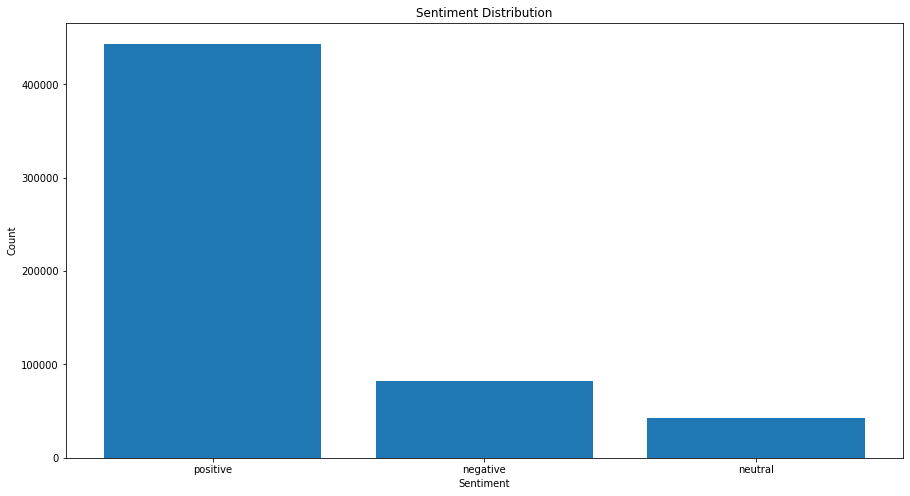

In [23]:
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

Based on the bar chart, we observe that the majority of reviews in the dataset exhibit positive sentiments. This suggests a trend where customers leave more positive feedback, influenced by factors such as product satisfaction, selective reviewing behavior, or inherent biases in the dataset.

However, it is important to note that a significant class imbalance exists in the sentiment distribution. The dataset heavily skews towards positive sentiments, posing challenges for the text classifier's performance, especially for the minority classes (negative and neutral sentiments). To address this imbalance, we will perform random undersampling of the majority class, randomly selecting a subset of instances from the positive sentiment class to balance the distribution of sentiment labels.

Reducing the bias in our dataset will improve the effectiveness and fairness of our sentiment analysis. It enables us to better capture and understand the nuances of different sentiment categories, resulting in more accurate and reliable results.

In [24]:
from sklearn.utils import resample

In [25]:
# randomly undersample the majority class

df_majority = df[df['Sentiment'] == 'positive']
df_majority_downsampled = resample(df_majority, replace=False, n_samples=sentiment_counts['negative'], random_state=42)

In [26]:
# combine the downsampled majority class with the minority classes

df = pd.concat([df_majority_downsampled, df[df['Sentiment'] != 'positive']])

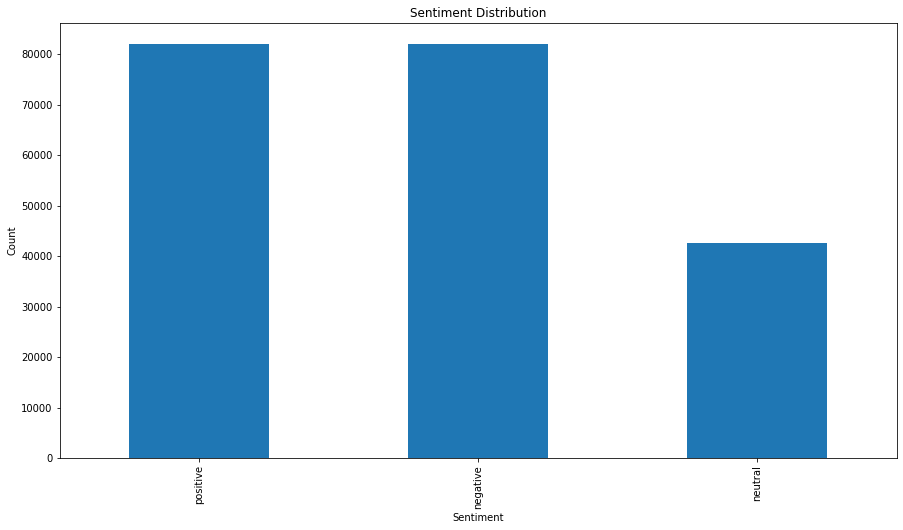

In [27]:
# distribution of sentiments

df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

After performing random undersampling, our updated data frame exhibits a more balanced sentiment distribution compared to the original dataset. Although the class imbalance has been mitigated, the neutral class still has fewer instances compared to the positive and negative sentiment classes. Nonetheless, this improved balance contributes to a more reliable and accurate sentiment analysis, reducing the potential bias that can arise from having a large majority class.

By addressing the class imbalance, we have taken steps to ensure that the sentiment analysis results are more representative of the underlying sentiment distribution in the dataset. This enhancement allows for a more comprehensive understanding of customer sentiments and facilitates more accurate decision-making processes based on the analysis outcomes.

### Word Frequency Analysis

In [28]:
# flatten list of tokenised words

tokenized_text = [nltk.word_tokenize(text) for text in df['Processed_Text']]
all_words = [word.lower() for text in tokenized_text for word in text]

In [29]:
# calculate word frequencies

freq_dist = nltk.FreqDist(all_words)
common_words = freq_dist.most_common(25)

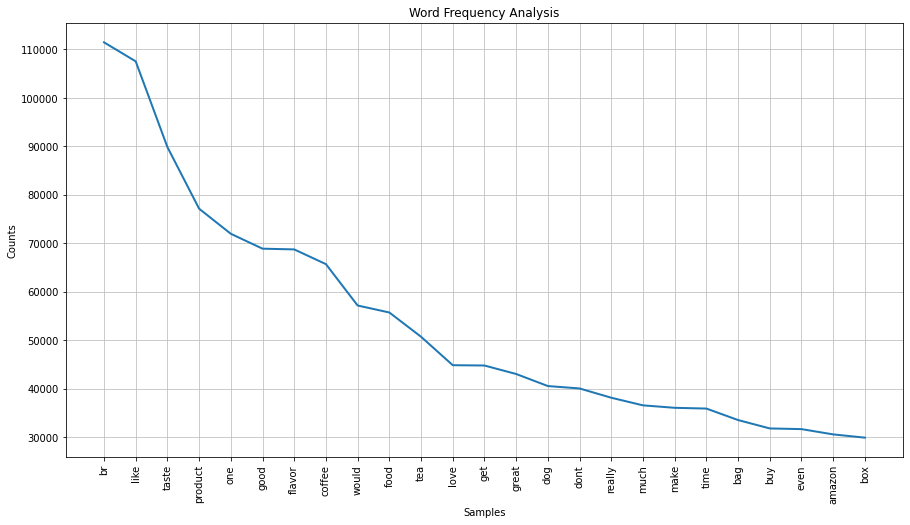

In [30]:
plt.title('Word Frequency Analysis')
freq_dist.plot(25, cumulative=False)
plt.show()

The word frequency analysis offered valuable insights into the prominent themes and topics in the customer reviews. The extraction of the top 25 common words revealed key patterns. Words such as *taste*, *good*, *love*, and *flavor* indicate that customers often express their opinions and preferences regarding the taste and quality of the products. The occurrence of words like *coffee*, *tea*, and *food* suggests that these specific product categories are frequently discussed in the reviews. Likewise, mentions of *Amazon*, *dog*, *time*, and *bag* highlight additional aspects of the feedback, including the purchasing experience on Amazon, references to pets, delivery times, and packaging. This analysis provides valuable insights into the general sentiment and focal points of customer reviews, enabling us to grasp the common topics and sentiments expressed by customers.

To obtain a more comprehensive comprehension of customer sentiments and themes, we will delve deeper into these topics using a Word Cloud. The Word Cloud visualization will visually depict the most frequently appearing words, offering insights into the prevalent customer sentiments and themes.

In [31]:
from wordcloud import WordCloud

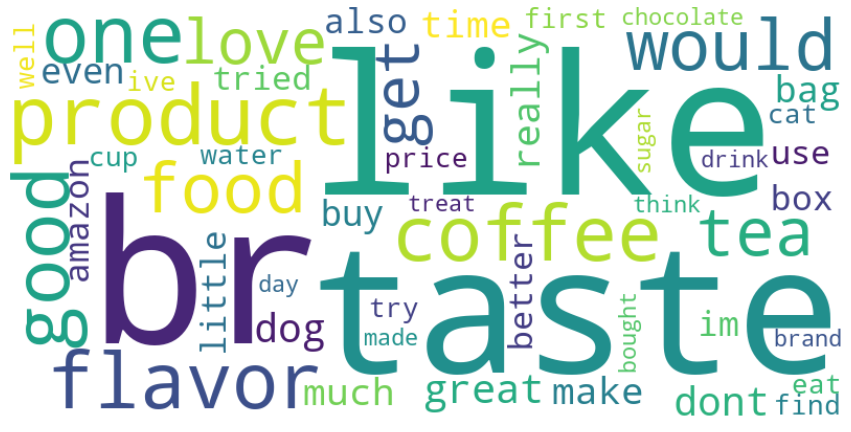

In [32]:
common_words = freq_dist.most_common(50)
word_freq = {word: freq for word, freq in common_words}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Summary Statistics

The summary statistics provide insights into the levels of helpfulness and engagement of the reviews.

In [33]:
numerator_stats = df['HelpfulnessNumerator'].describe()
numerator_stats

count    206652.000000
mean          1.941994
std           7.597985
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         844.000000
Name: HelpfulnessNumerator, dtype: float64

The mean value suggests that, on average, reviews have received approximately 2 helpful votes from other users. The standard deviation is approximately 7.598, indicating a relatively high level of variability in the number of helpful votes received by reviews. Some reviews may have received a significant number of helpful votes, while others have received very few or none. This indicates that while the majority of reviews have not received many helpful votes, there are some reviews that have received a considerable amount of engagement and assistance from other users. The wide range of values and the presence of outliers (e.g., the maximum value of 844) suggest that there are varying levels of helpfulness among the reviews in the dataset.

In [34]:
denominator_stats = df['HelpfulnessDenominator'].describe()
denominator_stats

count    206652.000000
mean          2.901109
std           8.767888
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

The mean value of 2.901 indicates a moderate level of engagement and interaction with the reviews. The standard deviation of approximately 8.768 indicates a relatively wide spread or variation in the values. This implies that the level of engagement with the reviews can significantly differ across various reviews.

### Trend Analysis

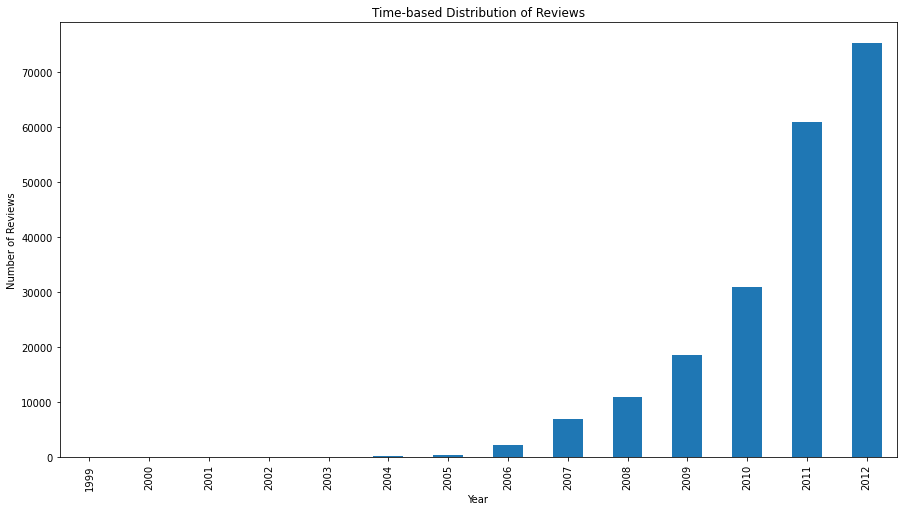

In [35]:
yearly_counts = df.groupby(df['Time'].dt.to_period('Y')).size()
yearly_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Time-based Distribution of Reviews')
plt.show()

The dataset includes reviews dating back to 1999, indicating the availability of historical data. This presents an opportunity to analyze trends and patterns over a long period and gain insights into customer sentiments and preferences over time. The number of reviews has been increasing over time, with a noticeable uptick starting from around 2005. This indicates a growing level of customer engagement and activity in terms of leaving reviews on the platform. The most significant surge in the number of reviews occurred in 2011, suggesting a substantial increase in customer reviews during that particular year. This surge could be attributed to various factors such as the rising popularity of online shopping, an expanding customer base, or changes in the platform's features or policies. Following the peak in 2011, the number of reviews seems to have leveled off and stabilized in the subsequent years. This suggests that the growth rate of reviews may have reached a saturation point or stabilized over time.

### Seasonal Analysis

In [36]:
# extract months and years

df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year

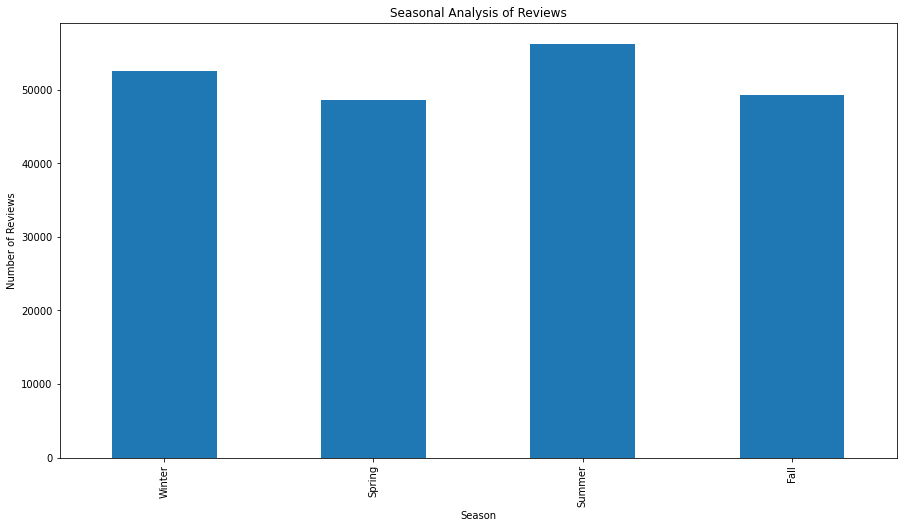

In [37]:
seasonal_counts = df.groupby(pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])).size()
seasonal_counts.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.title('Seasonal Analysis of Reviews')
plt.show()

The bar plot revealed a balanced distribution, indicating that the number of reviews across the seasons is relatively equal. There is no significant disparity in the review count between the four seasons (Winter, Spring, Summer, Fall). This suggests that customers consistently leave reviews throughout the year without a notable bias towards any specific season. The consistent distribution of reviews across seasons indicates that customers engage in providing feedback consistently throughout the year. This implies that factors influencing customer reviews, such as product quality, customer experience, or preferences, are not heavily influenced by seasonal variations. The consistent engagement in leaving reviews across seasons highlights the value customers place on sharing their experiences and opinions year-round. It underscores the importance of customer feedback and emphasizes the need for businesses to actively monitor and respond to customer reviews irrespective of the season.

### Distribution of Review Length

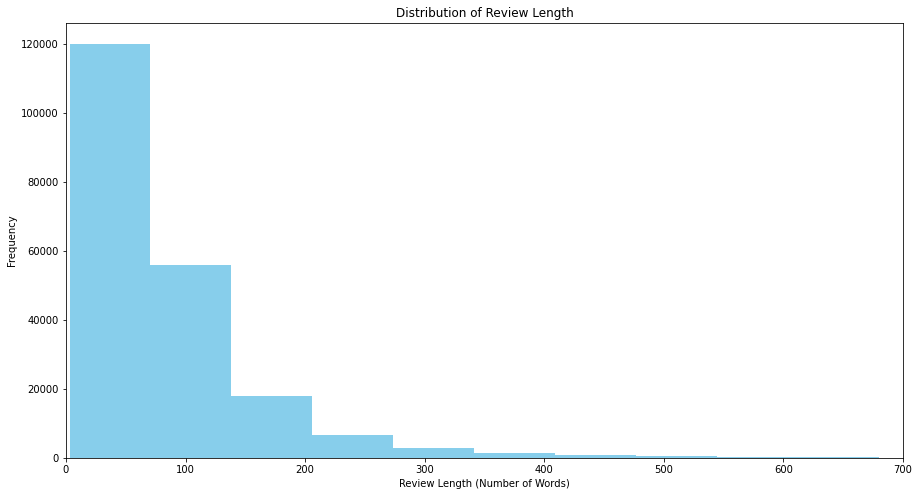

In [38]:
# Calculate the length of each review (number of words)
df['Review_Length'] = df['Text'].apply(lambda x: len(x.split()))

# Visualize the distribution using a histogram
plt.hist(df['Review_Length'], bins=50, color='skyblue')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')
plt.xlim(0, 700)
plt.show()

Based on the histogram of review lengths, a significant portion of the reviews in our dataset are relatively short, containing 80 words or fewer. These shorter reviews are prevalent, with a frequency of approximately 120,000 in our dataset. The prevalence of shorter reviews suggests that many customers express their opinions and experiences concisely. These reviews may provide quick and easily digestible information for readers who prefer brief summaries or are looking for a quick overview of others' experiences with the product or service.

There is also a moderate number of reviews with slightly longer lengths. These reviews may provide more detailed information and insights compared to the shorter ones. They typically range from 80 to 130 words and have a frequency of around 60,000. Beyond the 130-word mark, the frequency of reviews gradually decreases. There is a smaller proportion of reviews with lengths ranging from 131 to 200 words, totaling approximately 20,000 in frequency.

### Correlation Analysis

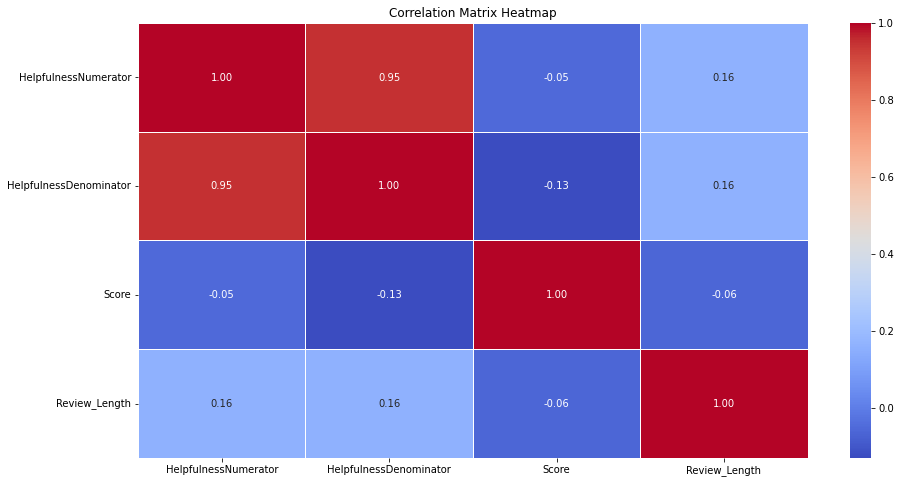

In [39]:
columns_for_correlation = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Review_Length']
correlation_matrix = df[columns_for_correlation].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation coefficient between `HelpfulnessNumerator` and `HelpfulnessDenominator` indicates a strong positive linear relationship. This suggests that there is a high correlation between the number of helpful votes a review receives and the total number of votes indicating whether the review is helpful or not. This correlation coefficient suggests that reviews that receive a higher number of helpful votes tend to also have a higher total number of votes. 

Both `HelpfulnessNumerator` and `HelpfulnessDenominator` show a weak negative linear relationship with `Score`. This suggests that there is a slight negative correlation between these factors and the score (rating) given to the review. However, since the correlation coefficients for these relationships are close to zero, the negative correlation is weak and not statistically significant. 

Additionally, the correlation coefficient between `Review_Length` and the other variables indicates a weak and relatively small linear relationship. This suggests that the length of the review does not have a strong influence on the number of helpful votes a review receives, nor does it have a significant impact on the score (rating) given to the review.

## Split the Data

In [40]:
from sklearn.model_selection import train_test_split

We will create a new dataframe that extracts the relevant columns for feature extraction and text classification. The new dataframe will contain only the `Sentiment` and `Processed_Text` columns from the original dataframe.

In [41]:
df_tClassfier = df[['Sentiment', 'Processed_Text']].copy()
df_tClassfier.head()

,Sentiment,Processed_Text
421441,positive,wanted food dog skin problem skin greatly impr...
474587,positive,always loved ronzonis small egg bow growing us...
43112,positive,like oclock coffee general disappointment good...
405383,positive,cappuccino cup waaaayyy sweet rated star deliv...
340299,positive,grew virginia tea always green sweet iced dran...


To split the data into training and testing sets, we will utilize the `train_test_split` function. The `Processed_Text` column will serve as the input (X), and the `Sentiment` column will be designated as the target (y). The resulting training set will be stored in `X_train` and `y_train`, while the testing set will be stored in `X_test` and `y_test`.

Considering the ample amount of data available in our current dataset, we can perform a proper held-out test <sup>[9]</sup>. We will split the data using an 80:20 ratio, with 80% allocated for training purposes and 20% reserved for testing (80:20 split). This approach allows us to train the model on a larger portion of the data, which can potentially enhance the model's performance. The remaining 20% will be utilized to evaluate the model's ability to generalize to unseen data.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    df_tClassfier['Processed_Text'],
    df_tClassfier['Sentiment'],
    test_size=0.2,
    random_state=42
)

## Baseline Performance

To compare our classifier with a baseline model, we can utilize a simple and widely adopted baseline approach. This baseline will serve as a reference point for evaluating the performance of the more advanced classifier.

### Create and Fit Pipeline

For feature extraction, we will utilize `TfidfVectorizer`. This step performs the feature extraction by transforming the text data into numerical features using TF-IDF values. We have chosen to use Multinomial Naive Bayes (NB) as our classifier. Multinomial Naive Bayes assumes that the features (words) are conditionally independent given the class label, making it suitable for problems involving categorical features <sup>[10]</sup>. It calculates the likelihood of a specific class (e.g., positive, negative, neutral) based on the frequency of features (e.g., words) in the text <sup>[11]</sup>.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

We define a pipeline that incorporates both components. After defining the pipeline, we fit it to the training data using the `fit()` method. This step trains the pipeline, with the vectorizer transforming the text data and the classifier being trained on the transformed features. Once the pipeline is trained, we can use it to predict the sentiment labels for the testing data using the `predict()` method.

In [44]:
# define the pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  
    ('classifier', MultinomialNB())  
])

In [45]:
# fit the pipeline on training data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [46]:
y_pred = pipeline.predict(X_test)

### Model Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

#### Classification Report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.69      0.87      0.77     16437
     neutral       0.86      0.05      0.10      8629
    positive       0.71      0.87      0.79     16265

    accuracy                           0.70     41331
   macro avg       0.75      0.60      0.55     41331
weighted avg       0.73      0.70      0.64     41331



The classifier achieves an accuracy of approximately 70% in predicting the sentiment of reviews. Considering the imbalanced nature of the dataset and the class distribution, this level of accuracy indicates that the model performs better than random guessing when it comes to sentiment prediction.

For the "negative" sentiment category, the model demonstrates a precision of 0.69, recall of 0.87, and an F1-score of 0.77, suggesting relatively effective identification of negative sentiments with a good balance between precision and recall. However, the model struggles in predicting the "neutral" sentiment category, as reflected by the low recall (0.05) and F1-score (0.10), indicating difficulty in capturing the nuances of neutral sentiment.

The model exhibits strong precision and recall in predicting negative and positive sentiments but faces challenges in accurately predicting neutral sentiments. The weighted average F1-score, accounting for class imbalance, is 0.64, providing an overall assessment of the model's performance across all sentiment categories. In contrast, the macro average F1-score, which does not consider class imbalance, is 0.55, indicating lower performance when equal importance is assigned to each sentiment category. Overall, the model has potential for improvement, particularly in effectively capturing instances of neutral sentiment.

#### Confusion Matrix

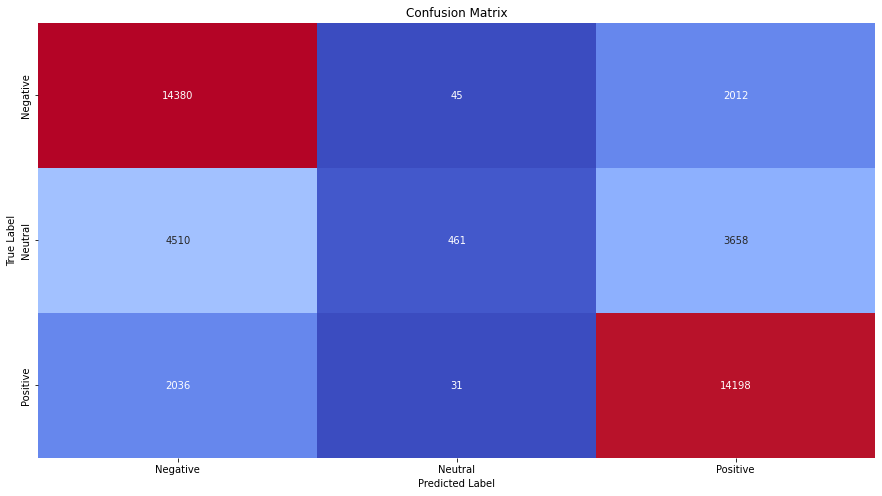

In [49]:
confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix offers a comprehensive analysis of the model's predictions across different sentiment categories. It provides detailed information about the actual and predicted classifications of the instances in the testing set.

Notably, we can observe that the model performs well in predicting negative and positive sentiments, as indicated by the high number of true negatives (14,380) and true positives (14,198), respectively. These results indicate that the model effectively identifies the intended sentiment. However, challenges arise when predicting the neutral sentiment category, as indicated by the misclassification of false negatives (4,510) and false positives (3,658). Enhancing the model's ability to accurately capture neutral sentiments will be a key area of focus for future improvements.

## Classification Approach

While the baseline model shows reasonable performance, there is room for improvement, especially in accurately classifying instances with neutral sentiment. Exploring alternative classifiers and fine-tuning model parameters are potential areas to focus on in order to enhance the model's performance. To ensure consistency in the evaluation process and enable a fair comparison between the baseline and our new classification approach, we will utilize the same data. This approach allows for a comparative analysis of different algorithms and provides insights into the most effective approach for sentiment analysis based on our dataset.

### Select Classifier

The Linear Support Vector Classifier (Linear SVC) is a supervised machine learning algorithm used for classification tasks. It is based on the Support Vector Machine (SVM) algorithm and is particularly effective in solving linear classification problems. Linear SVC aims to find an optimal hyperplane that separates the different classes in the feature space, maximizing the margin between them <sup>[12]</sup>. It is well-suited for text classification tasks, such as sentiment analysis, where the goal is to categorize text documents into different sentiment categories based on their features. Linear SVC is computationally efficient compared to other SVMs, as it tends to converge faster when dealing with large datasets <sup>[13]</sup>.

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

# inspired from https://medium.com/intel-analytics-software/from-hours-to-minutes-600x-faster-svm-647f904c31ae
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [51]:
# define the pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

### Hyperparameter Tuning

We will perform hyperparameter tuning using a subset of the training data. Hyperparameter tuning is the process of finding optimal values for the hyperparameters of a machine learning model to improve its performance. By splitting the training data into a smaller subset (`X_subset`, `y_subset`), we create a representative sample that allows for efficient hyperparameter tuning without using the entire dataset. This smaller subset helps reduce computation time while still capturing the underlying characteristics of the data.

In [52]:
# split the data into a small subset for hyperparameter tuning

X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

The hyperparameter grid (`param_grid`) defines the range of values that will be explored for each hyperparameter. We will tune the hyperparameters of both the TfidfVectorizer and the LinearSVC classifier.

For the TfidfVectorizer, we will tune the `ngram_range`, which specifies the range of n-grams (word combinations) to consider. Additionally, we will tune the `min_df` and `max_df` parameters, which control the inclusion of words based on their document frequency. 

Regarding the LinearSVC classifier, we will tune the C parameter (`classifier__C`), which controls the regularization strength. The C parameter determines the trade-off between achieving a low training error and keeping the model's coefficients small.

In [53]:
# define the hyperparameter grid

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__min_df': [1, 2],
    'vectorizer__max_df': [0.9, 0.95],
    'classifier__C': [0.1, 1.0, 10.0]
}

In [54]:
# perform random search cross-validation

random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_subset, y_subset)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                             ('classifier', LinearSVC())]),
                   param_distributions={'classifier__C': [0.1, 1.0, 10.0],
                                        'vectorizer__max_df': [0.9, 0.95],
                                        'vectorizer__min_df': [1, 2],
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]},
                   random_state=42, scoring='accuracy')

In [55]:
# get the best hyperparameters and score

print(f'best parameters: {random_search.best_params_}')
print(f'best score: {random_search.best_score_}')

best parameters: {'vectorizer__ngram_range': (1, 2), 'vectorizer__min_df': 1, 'vectorizer__max_df': 0.9, 'classifier__C': 1.0}
best score: 0.8251203054009731


### Model Training

After performing random search cross-validation, the best hyperparameters are identified. These optimized hyperparameters are then utilized to train the final model, which generates predictions for the sentiment of the test data.

In [58]:
# use the best hyperparameters to train the final model

pipeline.set_params(**random_search.best_params_)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('classifier', LinearSVC())])

In [59]:
y_pred = pipeline.predict(X_test)

### Model Evaluation

#### Classification Report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.89      0.87     16437
     neutral       0.77      0.62      0.69      8629
    positive       0.86      0.91      0.89     16265

    accuracy                           0.84     41331
   macro avg       0.83      0.81      0.81     41331
weighted avg       0.84      0.84      0.84     41331



Based on the evaluation results, the advanced model has shown significant improvements compared to the baseline model. The accuracy of the updated model is 0.84, indicating a significant improvement at first glance.

The advanced model achieved higher precision and recall values across all sentiment categories compared to the baseline model. It demonstrates improved precision in predicting the "neutral" sentiment category (0.77), indicating a higher percentage of correctly identified instances with neutral sentiment. The recall for the "neutral" sentiment category (0.62) also shows improvement, indicating the model's ability to capture a larger proportion of true neutral sentiment instances. The "negative" and "positive" sentiment categories also show higher precision and recall values, suggesting improved classification performance.

Furthermore, the advanced model shows higher F1-scores across all sentiment categories, indicating a better balance between precision and recall. The F1-scores for the "negative" (0.87) and "positive" (0.89) sentiment categories demonstrate improved overall performance compared to the baseline model. The F1-score for the "neutral" sentiment category (0.69) has also increased, indicating a better ability to classify instances with neutral sentiment. The advanced model outperforms the baseline model by demonstrating better discrimination between sentiment categories, particularly for the challenging "neutral" category. The improved performance of the advanced model can be attributed to the hyperparameter tuning process, which fine-tuned the model's settings to better capture the nuances of sentiment in the data.

#### Confusion Matrix

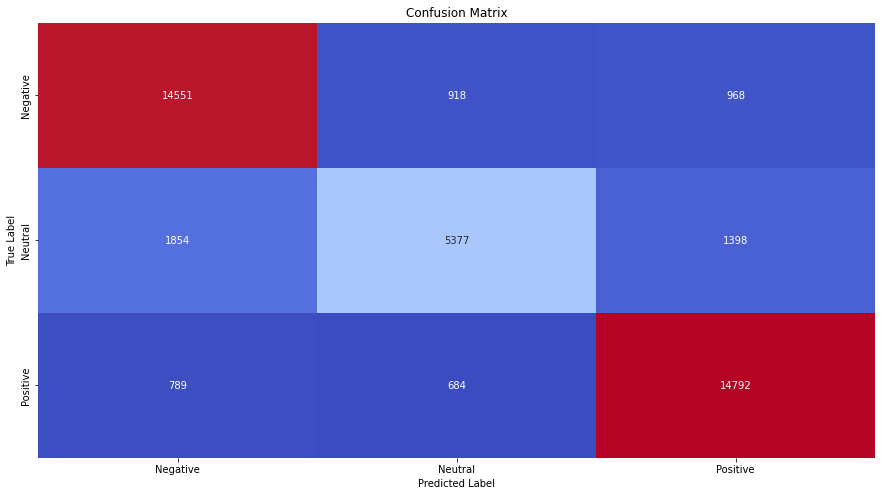

In [61]:
confusion_m = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The advanced model successfully identified a large number of true negative instances (TN), indicating a high ability to accurately classify negative sentiment. The model also showed improvement in correctly identifying true neutral instances (TN) compared to the baseline model. However, there are still some false positive (FP) and false negative (FN) instances, indicating areas where the model can further improve in classifying neutral sentiment. The advanced model performed well in accurately classifying positive sentiment, with a high number of true positive instances (TP). The false positive (FP) and false negative (FN) instances are relatively low, indicating improved performance compared to the baseline model.

Overall, the confusion matrix of the advanced model shows enhanced performance compared to the baseline model. It demonstrates better accuracy in classifying sentiment across all categories, particularly for negative and positive sentiments. However, there is still room for improvement, especially in correctly identifying instances with neutral sentiment. By comparing the confusion matrix of the advanced model with that of the baseline model, we can observe that the advanced model shows reduced misclassifications and improved accuracy in sentiment classification, indicating the effectiveness of the hyperparameter tuning process in enhancing the model's performance.

## Conclusion

In conclusion, our project aimed to develop a sentiment classification model for customer reviews using machine learning techniques. This project on sentiment analysis in the e-commerce industry has provided valuable insights and made significant contributions to addressing the challenges associated with customer reviews and sentiment classification.

The results obtained from the baseline model and the advanced model demonstrate the effectiveness of natural language processing techniques and machine learning algorithms in accurately predicting sentiment polarity. The baseline model served as a benchmark for comparison, while our classifier based on the Linear Support Vector Classifier exhibited a substantial improvement in sentiment classification accuracy. This development showcases the potential to extract meaningful insights from customer reviews, enabling businesses to understand customer satisfaction, preferences, and expectations.

Throughout the project, we prioritized evaluation, the effectiveness of preprocessing techniques, obtained results, and reproducibility. Reproducibility is crucial for collaboration, scientific progress, and result reliability. Our project implementation can be replicated by others using different programming languages, development environments, libraries, and algorithms. Although we utilized Python and popular libraries like scikit-learn, similar tasks can be accomplished using different programming languages such as R or Java and their respective libraries. The core concepts of preprocessing, feature extraction, model training, and evaluation can be applied in various environments and with different algorithms, providing flexibility in implementation.

Our project makes a valuable contribution to the field of sentiment analysis by providing insights that help businesses understand customer sentiment and make data-driven decisions. Accurate sentiment classification empowers businesses to identify strengths, weaknesses, and areas for improvement, ultimately fostering customer satisfaction and guiding product development strategies. Additionally, our project has equipped us with valuable knowledge in data preprocessing, exploratory data analysis, feature extraction, and model evaluation. It lays the groundwork for future research in sentiment analysis and paves the way for advancements in understanding and effectively leveraging customer feedback.

## References

[1] &emsp;Amazon.com, Inc. (n.d.). *What is ecommerce? Launch and grow an online sales channel.* Retrieved from https://sell.amazon.com/learn/what-is-ecommerce#top
<br>
[2] &emsp;Mukherjee, S., & Bhattacharyya, P. (2012). *Feature specific sentiment analysis for product reviews.* arXiv preprint arXiv:1209.2352.
<br>
[3] &emsp;Hetler, A. (2022, August 26). How much can a bad review hurt your business? *TechTarget*. Retrieved from https://www.techtarget.com/whatis/feature/How-much-can-a-bad-review-hurt-your-business
<br>
[4] &emsp;Liu, B. (2009). Handbook chapter: sentiment analysis and subjectivity. Handbook of natural language processing. *Handbook of Natural Language Processing. Marcel Dekker, Inc. New York, NY, USA*.
<br>
[5] &emsp;Chacko, A. (2023, June 27). How to analyze customer reviews for brand insights. *Sprout Special*. Retrieved from https://sproutsocial.com/insights/review-analysis/
<br>
[6] &emsp;Podolsky, M. (2022, October 13). How Timely Responses To Online Reviews Help Shape Your Brand Image. *Forbes: Forbes Business Council*. Retrieved from https://www.forbes.com/sites/forbesbusinesscouncil/2022/10/13/how-timely-responses-to-online-reviews-help-shape-your-brand-image/?sh=50b248045559
<br>
[7] &emsp;Stapleton-Charles, N. (n.d.). How Reviews Can Impact the Business to Consumer Relationship. *Weave Communications, Inc*. Retrieved from https://www.getweave.com/how-reviews-can-impact-the-business-to-consumer-relationship/
<br>
[8] &emsp;Rumi, A. (2021). Amazon Product Reviews. *Kaggle*. Retrieved from https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
<br>
[9] &emsp;Allison, B. (2012, November 29). Is there a rule-of-thumb for how to divide a dataset into training and validation sets? [closed]. *Stack Overflow*. Retrieved from https://stackoverflow.com/a/13623707
<br>
[10] &emsp;jlund3. (2012, August 9). Difference between naive Bayes & multinomial naive Bayes. *Stack Exchange*. Retrieved from https://stats.stackexchange.com/q/34002
<br>
[11] &emsp;Ray, S. (2023, May 11). Naive Bayes Classifier Explained: Applications and Practice Problems of Naive Bayes Classifier. *Analytics Vidhya*. Retrieved from https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/#Applications_of_Naive_Bayes_Algorithm/
<br>
[12] &emsp;Saini, A. (2021, October 12). Guide on Support Vector Machine (SVM) Algorithm. *Analytics Vidhya*. Retrieved from https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/
<br>
[13] &emsp;eickenberg. (2016, January 29). When should one use LinearSVC or SVC? *Stack Overflow*. Retrieved from https://stackoverflow.com/a/35081862
<br>
[14] &emsp;Nik. (2021, September 24). Python: Remove Punctuation from a String (3 Different Ways!). *datagy.io*. Retrieved from https://datagy.io/python-remove-punctuation-from-string/
<br>
[15] &emsp;Kalyanov, D. (2020, December 30). From Hours to Minutes: 600x Faster SVM. *Medium*. Retrieved from https://medium.com/intel-analytics-software/from-hours-to-minutes-600x-faster-svm-647f904c31ae